# Data Check

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

Let's now see what data we were able to collect in the previous step

### Data shape and example

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('data_science_jobs_USA.csv')

In [4]:
data.shape

(26634, 7)

In [5]:
data.tail(3)

,company,date,job_description,job_title,job_url,location,salary
26631,Infosys Limited,2 days ago,Job SummaryExternal Role / Title: Team Lead – ...,Team Lead – Big Data Engineer,http://www.indeed.com/company/DDB-Mudra-Privat...,"Tomball, TX",NaN
26632,Infosys Limited,2 days ago,NaN,Big Data Engineer - AWS & Hadoop,http://www.indeed.com/company/DDB-Mudra-Privat...,"Tomball, TX",NaN
26633,Matrix Resources,13 days ago,NaN,Data Engineer,http://www.indeed.com/rc/clk?jk=82eef152a602a1...,"Spring, TX 77389",NaN


### Number of jobs by company 

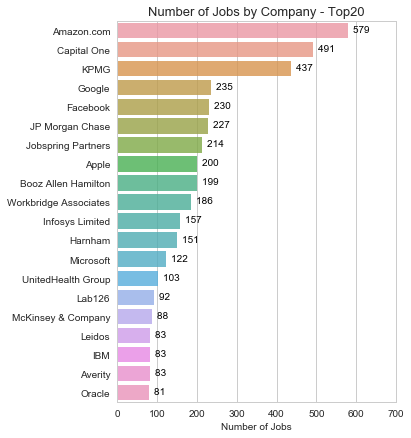

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

top20 = data['company'].value_counts().head(20)

sns.set_palette("Reds", n_colors=10) #("Paired")
sns.set(style="whitegrid")
plt.figure(figsize=(5,7))

sns.barplot( top20.values, top20.index, alpha=0.8)

plt.title('Number of Jobs by Company - Top20', fontsize=13)
plt.xlabel('Number of Jobs', fontsize=10)

# Get current axis on current figure
ax = plt.gca()
ax.set_xlim(0,700)

# loop through all bars of the barplot
for i, p in enumerate(ax.patches):
    ax.annotate("%.0f " % (p.get_width()),
                (p.get_x() + p.get_width(), p.get_y() + 0.9  ),
                xytext=(5, 8), 
                textcoords='offset points', 
                color='black',
                fontsize=10
               )
plt.show()

### Number of jobs by state 

Cleaning up locations data and preparing separate columns for cities and states:

In [7]:
data['state'] = data['location'].str.replace('\d+', '').str.split(',').str[1].str[1:3]
data['city'] = data['location'].str.replace('\d+', '').str.split(',').str[0]
data['city_state'] = data['city'] + ", " + data['state'] 

data.head(3)


,company,date,job_description,job_title,job_url,location,salary,state,city,city_state
0,Workplace Alaska,10 days ago,This individual position is EXEMPT from the hi...,Research Analyst III,http://www.indeed.com/rc/clk?jk=42399517a00f67...,"Juneau, AK","$5,017 a month",AK,Juneau,"Juneau, AK"
1,Lili‘uokalani Trust,30+ days ago,"Job Title: Manager, Data Science Reports to: D...","Manager, Data Science",http://www.indeed.com/rc/clk?jk=bd079f6b150eb0...,"Honolulu, HI",NaN,HI,Honolulu,"Honolulu, HI"
2,Hawaii Medical Service Association,30+ days ago,Data Management: Reviews data sources and prep...,Advanced Data Analyst I - Jr. Data Scientist,http://www.indeed.com/rc/clk?jk=ebea4074e03761...,"Honolulu, HI 96814 (Makiki area)",NaN,HI,Honolulu,"Honolulu, HI"


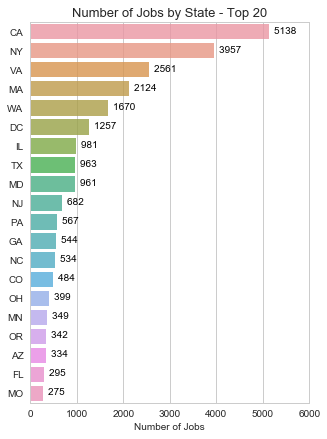

In [8]:
top20 = data['state'].value_counts().head(20)

sns.set(style="whitegrid")
plt.figure(figsize=(5,7))

sns.barplot( top20.values, top20.index, alpha=0.8)

plt.title('Number of Jobs by State - Top 20', fontsize=13)
plt.xlabel('Number of Jobs', fontsize=10)

# Get current axis on current figure
ax = plt.gca()
ax.set_xlim(0,6000)

# loop through all bars of the barplot
for i, p in enumerate(ax.patches):
    ax.annotate("%.0f " % (p.get_width()),
                (p.get_x() + p.get_width(), p.get_y() + 0.9  ),
                xytext=(5, 8), 
                textcoords='offset points', 
                color='black',
                fontsize=10
               )
plt.show()


No surprise, California and New York are leading the list

In [9]:
states = data['state'].value_counts()


In [10]:
# Creating a dictionary of all states and their abbreviations

us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK',  'Arizona': 'AZ',  'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia' : 'DC',
}


In [11]:
jobdist = {}

for key, value in us_state_abbrev.items():
    
    try:
        value = states[value]
        jobdist[key]= value
    except:
        jobdist[key]= 0

# print(jobdist)
        

This part of code needs the three following files to be in the same directory: 
st99_d00.dbf
st99_d00.shp
st99_d00.shx <br>
They can be found under the link: https://github.com/matplotlib/basemap/tree/master/examples

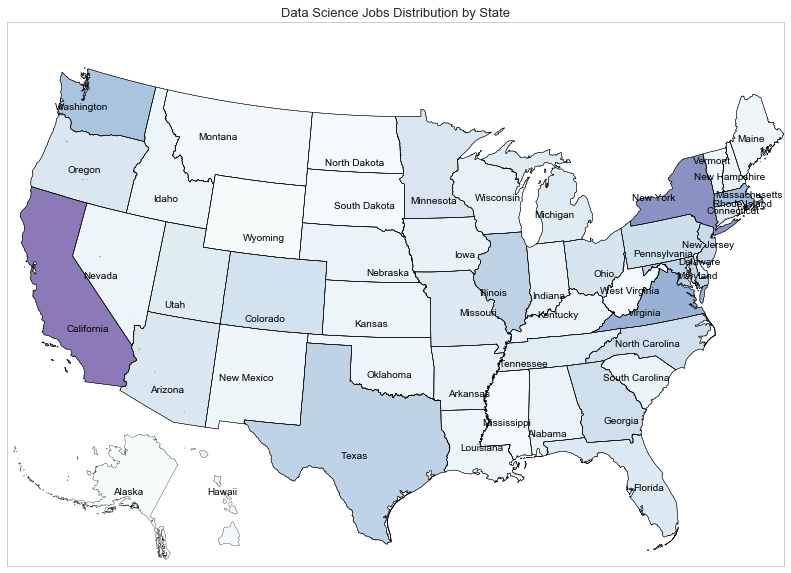

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from scipy.spatial import ConvexHull, Voronoi

# Setting the limits of the map
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=50.5, 
            projection='lcc', lat_1=33,lat_2=45,lon_0=-96)

# Setting the size limits
plt.subplots(num=None, figsize=(15, 10))

shp_info = m.readshapefile('st99_d00/st99_d00','states',drawbounds=True)


# Choosing a color for each state
colors={}
statenames=[]

# Setting color map amd range for it
cmap = plt.cm.BuPu
vmin = 0; vmax = 15000 

for shapedict in m.states_info:
    
    statename = shapedict['NAME']
    
    # Skipping DC and Puerto Rico
    if statename not in ['District of Columbia','Puerto Rico']:
                
        jd = jobdist[statename]        
        # Taking sqrt roots to spread the colors more
        colors[statename] = cmap(np.sqrt((jd-vmin)/(vmax-vmin)))[:3]       
            
    statenames.append(statename)
    
# Coloring each state
ax = plt.gca() # Getting current axes instance

printed_names = [] # Creating a list of the states that have already been labeled

for nshape,seg in enumerate(m.states):

    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:       
        
        # Scaling Alaska to 30% and changing its location
        if statenames[nshape] == 'Alaska':
            seg = [(x[0]*0.3 + 900000, x[1]*0.3 - 1100000) for x in seg]
            
        # Moving Hawaii closer on the map
        if statenames[nshape] == 'Hawaii':
            seg = [(x[0] + 5000000, x[1] - 1300000) for x in seg]
        
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color, edgecolor='black')
        ax.add_patch(poly)
        
        # Checking if the label has already been printed
        if statenames[nshape] in printed_names: 
            continue
        
        # Manual alignment of some states' labels to avoid overlapping
        if statenames[nshape] == 'Wisconsin':
            plt.text(2960000, 2200000, statenames[nshape], ha="center",
                     color = 'black', fontsize = 10)
        elif statenames[nshape] == 'Michigan':
            plt.text(3300000, 2100000, statenames[nshape], ha="center", 
                     color = 'black', fontsize = 10)
        elif statenames[nshape] == 'Hawaii':
            plt.text(1300000, 430000, statenames[nshape], ha="center", 
                     color = 'black', fontsize = 10)
        elif statenames[nshape] == 'New York':
            plt.text(3900000, 2200000, statenames[nshape], ha="center", 
                     color = 'black', fontsize = 10)
        else:
            # Getting the center of polygon
            x, y = np.array(seg).mean(axis=0)
            hull = ConvexHull(seg)
            hull_points = np.array(seg)[hull.vertices]
            # Getting the center of convex hull over the polygon points
            x, y = hull_points.mean(axis=0)

            plt.text(x+ 1, y, statenames[nshape], ha="center", 
                     color = 'black', fontsize = 10)
            
        printed_names.append(statenames[nshape])
        
plt.title('Data Science Jobs Distribution by State', fontsize = 13)
plt.show()


### Number of Jobs by City

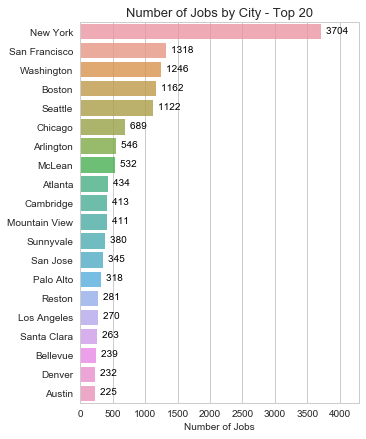

In [13]:
top20 = data['city'].value_counts().head(20)

sns.set(style="whitegrid")
plt.figure(figsize=(5,7))

sns.barplot( top20.values, top20.index, alpha=0.8)

plt.title('Number of Jobs by City - Top 20', fontsize=13)
plt.xlabel('Number of Jobs', fontsize=10)

# Get current axis on current figure
ax = plt.gca()
ax.set_xlim(0,4300)

# loop through all bars of the barplot
for i, p in enumerate(ax.patches):
    ax.annotate("%.0f " % (p.get_width()),
                (p.get_x() + p.get_width(), p.get_y() + 0.9  ),
                xytext=(5, 8), 
                textcoords='offset points', 
                color='black',
                fontsize=10
               )
plt.show()


The #1 position of New York is explained by limitations on Indeed website, which is 1000 jobs per city. <br>
Since we had a radius set up to 10 miles, the scraper reached some more jobs in the NYC area when scraping the nearby smaller cities.

In [14]:
cities = data['city_state'].value_counts().head(500)


In [15]:
# When using Nominatim, we need a full state name for more precise city definition

# Switching keys and values in us_state_abbrev dictionary for later iteration
us_state_names = {y:x for x, y in us_state_abbrev.items()}

In [16]:
# Preparing a dictionary with updated city/state addresses 

dist_by_city = {}

for x in cities.items():
    
    abr = x[0][-2:]
    f_name = us_state_names[abr]

    key = x[0][:-2] + f_name 
    value = x[1]    
    dist_by_city[key]= value

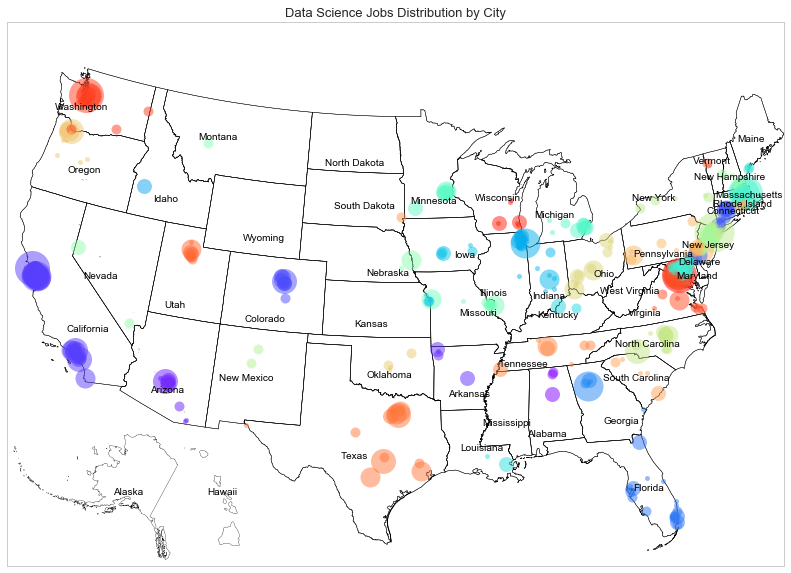

In [17]:
from geopy.geocoders import Nominatim
import math
import time

# Setting the limits of the map
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=50.5, 
            projection='lcc', lat_1=33,lat_2=45,lon_0=-96)

# Setting the size limits
plt.subplots(num=None, figsize=(15, 10))

shp_info = m.readshapefile('st99_d00/st99_d00','states',drawbounds=True)

statenames=[]
for shapedict in m.states_info:    
    statename = shapedict['NAME']                 
    statenames.append(statename)

# Labeling each state
ax = plt.gca() # Getting current axes instance
printed_names = [] # Creating a list of the states that have already been labeled

for nshape,seg in enumerate(m.states):

    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:       
        
        # Scaling Alaska to 30% and changing its location
        if statenames[nshape] == 'Alaska':
            seg = [(x[0]*0.3 + 900000, x[1]*0.3 - 1100000) for x in seg]
            
        # Moving Hawaii closer on the map
        if statenames[nshape] == 'Hawaii':
            seg = [(x[0] + 5000000, x[1] - 1300000) for x in seg]      
        
        poly = Polygon(seg, facecolor='white', edgecolor='black')
        ax.add_patch(poly)
        
        # Checking if the label has already been printed
        if statenames[nshape] in printed_names: 
            continue
        
        # Manual alignment of some states' labels to avoid overlapping
        if statenames[nshape] == 'Wisconsin':
            plt.text(2960000, 2200000, statenames[nshape], ha="center",
                     color = 'black', fontsize = 10)
        elif statenames[nshape] == 'Michigan':
            plt.text(3300000, 2100000, statenames[nshape], ha="center", 
                     color = 'black', fontsize = 10)
        elif statenames[nshape] == 'Hawaii':
            plt.text(1300000, 430000, statenames[nshape], ha="center", 
                     color = 'black', fontsize = 10)
        elif statenames[nshape] == 'New York':
            plt.text(3900000, 2200000, statenames[nshape], ha="center", 
                     color = 'black', fontsize = 10)
        else:
            # Getting the center of polygon
            x, y = np.array(seg).mean(axis=0)
            hull = ConvexHull(seg)
            hull_points = np.array(seg)[hull.vertices]
            # Getting the center of convex hull over the polygon points
            x, y = hull_points.mean(axis=0)

            plt.text(x+ 1, y+0.7, statenames[nshape], ha="center", 
                     color = 'black', fontsize = 10)
            
        printed_names.append(statenames[nshape])

# Setting separate colour for each state
colors = plt.cm.rainbow(np.linspace(0, 1, len(us_state_names)))  

states_list = list(us_state_names.values())
        
# Get the location of each city and plot it
geolocator = Nominatim(user_agent="my-application")

scale = 5
for city, count in dist_by_city.items():  
    
    try:
        loc = geolocator.geocode(city)
        time.sleep(3)
        x, y = m(loc.longitude, loc.latitude)
        
        state_name = city.split(', ')[1]       
        color_index = states_list.index(state_name)
        m.plot(x, y, marker='o',color=colors[color_index], alpha=0.5, markersize=int(math.log(count+1))*scale)
        
    except:
        continue
        
plt.title('Data Science Jobs Distribution by City', fontsize = 13)

plt.show()

### Most popular words in the titles

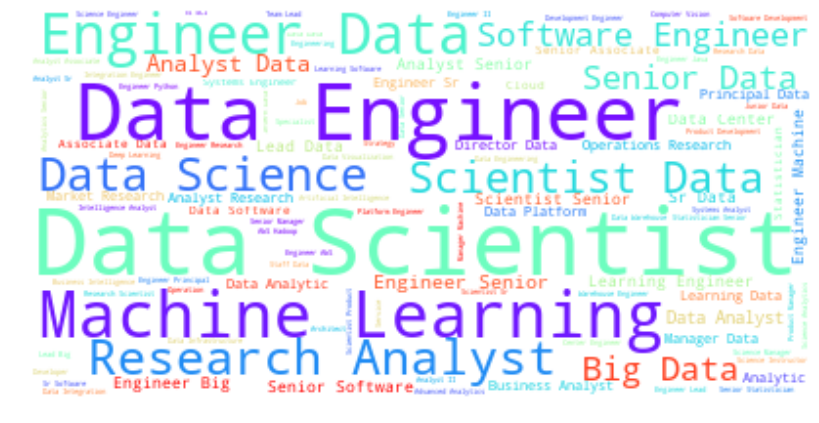

In [19]:
from wordcloud import WordCloud, STOPWORDS

#plt.switch_backend('agg')
%matplotlib inline

plt.figure(figsize=(14,10))
stopwords = set(STOPWORDS)

#stopwords.add("Data")

text = ' '.join(data.job_title[:-1])

# Create and generate a word cloud image:
wc = WordCloud(background_color="white", max_words=400, max_font_size = 50, collocations=True,
               stopwords=stopwords, contour_width=2, colormap = "rainbow")

# generate word cloud
wc.generate(text)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

Even though we scraped data science jobs, there are also different titles like Analyst, Machine Learning or Big Data Engineer that potentially mean different job duties. Let's dig into job ad descriptions.